This is a demonstration of how neural networks can be used for to replace the dynamic programming for beam search

Importing Requirements

In [1]:
import random
import numpy as np
import torch
from math import log
from numpy import array
from numpy import argmax
import torch.nn.functional as F
import  matplotlib.pyplot as plt
import numpy as np

Beam search by dynamic algorithm to get truth value

In [2]:
def beam_search_decoder(data, k):
    path =[[list(), 1.0]]
    for row in range(len(data)):
        selected_path = []
        index_score = []
        for i in path:
            sequence, score = i
            for j in range(len(data[row])):
                index_score.append([sequence+[j],score * -log(data[row][j])])
            selected_path.append(index_score)
        sorted_index_score = sorted(index_score, key= lambda tup : tup[1])
        path = sorted_index_score[:k]
    return path

To one hot truth value

In [3]:
def to_one_hot(array):
    one_hot_array = np.zeros([10,10])
    for i, n in enumerate(array):
        one_hot_array[i][n] = 1 
    return one_hot_array

Get the data and truth value

In [4]:
def get_data():
    data = np.random.rand(10,10)
    data = array(data)
    result = beam_search_decoder(data, 1)
    return torch.Tensor(data), torch.Tensor(to_one_hot(result[0][0]))

Defining neural network 

In [5]:
class nn_dynamic(torch.nn.Module):
    def __init__(self):
        super(nn_dynamic,self).__init__()
        self.cnnGRU = torch.nn.GRU(10,100,1)
        self.dense = torch.nn.Linear(100, 10)
    def forward(self,input):
        input = input.view(1, 10,10)
        GRU_out = self.cnnGRU(torch.Tensor(input))[0]
        GRU_out = F.relu(GRU_out)
        GRU_out= GRU_out.view(10,100)
        out = self.dense(GRU_out)
        out = F.relu(out)
        return torch.softmax(out,1)

In [6]:
nnd = nn_dynamic()

Defining loss and optimizer

In [9]:
criteria = torch.nn.BCELoss()
optimizer = torch.optim.SGD(nnd.parameters(), lr=0.1, momentum=0.9)

Running Training

In [10]:
loss_accumlator = []
for i in range(10000):
    data, truth = get_data()
    optimizer.zero_grad()
    predicted = nnd(data)
    loss = criteria(predicted, truth)
    loss_accumlator.append(loss.item())
    loss.backward()
    optimizer.step()

Plotting loss

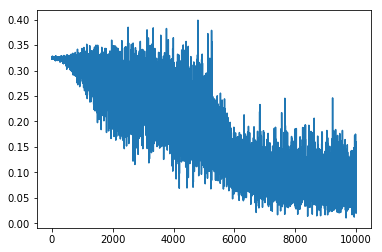

In [11]:
plt.plot(loss_accumlator)